In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('telecomModified.csv')
df.head()

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,OCCUP_CD,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,TOP1_INT_CD,TOP2_INT_CD,TOP3_INT_CD,CUSTOMER_TYPE,ID_CHANGE_FLAG
0,1,26.0,F,M,702.0,NaN,575,3,2136,1.0,cs,18,105,NONE,NONE,4G,0
1,10,46.0,F,M,702.0,OTH,572,3,2242,1.0,co,1,NONE,NONE,NONE,4G,0
2,100,26.0,M,S,702.0,NaN,1252,3,2107,1.0,cs,0,NONE,NONE,NONE,4G,0
3,1000,38.0,M,S,702.0,NaN,2073,3,2102,1.0,cs,5,104,105,103,4G,0
4,10000,17.0,M,S,702.0,NaN,360,4,2242,1.0,cs,11,NONE,NONE,NONE,3G,0


In [3]:
df.shape

(15000, 17)

The Data contains 15,000 rows and 17 columns.

In [5]:
#2.As the data modeler for the company, you’re tasked to develop a predictive
#model to determine the customer type.
#1. Identify your target variable’s name.
#2. Determine your target variable’s type.
#3. What type of problem are you addressing? (classification, regression, etc.)

# Answer:
# 1.Target Variable is customer 4G
# 2.Target variable type is categorical
# 3.Problem type is Classification


In [6]:
#3 Remove the following columns from the table, naming the new dataframe telecomSelected:
#• TOP1 INT CD
#• TOP2 INT CD
#• TOP3 INT CD
#• OCCUP CD
#• ID CHANGE FLAG

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial_Number   15000 non-null  int64  
 1   AGE             14589 non-null  float64
 2   GENDER          14997 non-null  object 
 3   MARITAL_STATUS  14193 non-null  object 
 4   NATIONALITY     14986 non-null  float64
 5   OCCUP_CD        5381 non-null   object 
 6   LINE_TENURE     15000 non-null  int64  
 7   CUSTOMER_CLASS  15000 non-null  int64  
 8   SUBPLAN         15000 non-null  int64  
 9   CONTRACT_FLAG   14224 non-null  float64
 10  PAY_METD        14257 non-null  object 
 11  HS_AGE          15000 non-null  int64  
 12  TOP1_INT_CD     15000 non-null  object 
 13  TOP2_INT_CD     15000 non-null  object 
 14  TOP3_INT_CD     15000 non-null  object 
 15  CUSTOMER_TYPE   15000 non-null  object 
 16  ID_CHANGE_FLAG  15000 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
TelecomSelected = df.drop(['TOP1_INT_CD', 'TOP2_INT_CD', 'TOP3_INT_CD', 'OCCUP_CD', 'ID_CHANGE_FLAG'], axis = 1)

In [35]:
TelecomSelected.head()

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,CUSTOMER_TYPE
0,1,26.0,F,M,702.0,575,3,2136,1.0,cs,18,4G
1,10,46.0,F,M,702.0,572,3,2242,1.0,co,1,4G
2,100,26.0,M,S,702.0,1252,3,2107,1.0,cs,0,4G
3,1000,38.0,M,S,702.0,2073,3,2102,1.0,cs,5,4G
4,10000,17.0,M,S,702.0,360,4,2242,1.0,cs,11,3G


In [10]:
#4 Check the type of each variable in the telecomSelected dataset from Question 3. Adjust
#   any variables that don’t align with the types specified in the above table (Table 3.1)
TelecomSelected.dtypes

Serial_Number       int64
AGE               float64
GENDER             object
MARITAL_STATUS     object
NATIONALITY       float64
LINE_TENURE         int64
CUSTOMER_CLASS      int64
SUBPLAN             int64
CONTRACT_FLAG     float64
PAY_METD           object
HS_AGE              int64
CUSTOMER_TYPE      object
dtype: object

In [12]:
TelecomSelected['GENDER'] = TelecomSelected['GENDER'].astype('category')
TelecomSelected['MARITAL_STATUS'] = TelecomSelected['MARITAL_STATUS'].astype('category')
TelecomSelected['NATIONALITY'] = TelecomSelected['NATIONALITY'].astype('category')
TelecomSelected['CUSTOMER_CLASS'] = TelecomSelected['CUSTOMER_CLASS'].astype('category')
TelecomSelected['SUBPLAN'] = TelecomSelected['SUBPLAN'].astype('category')
TelecomSelected['CONTRACT_FLAG'] = TelecomSelected['CONTRACT_FLAG'].astype('category')
TelecomSelected['PAY_METD'] = TelecomSelected['PAY_METD'].astype('category')
TelecomSelected['CUSTOMER_TYPE'] = TelecomSelected['CUSTOMER_TYPE'].astype('category')

In [13]:
TelecomSelected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Serial_Number   15000 non-null  int64   
 1   AGE             14589 non-null  float64 
 2   GENDER          14997 non-null  category
 3   MARITAL_STATUS  14193 non-null  category
 4   NATIONALITY     14986 non-null  category
 5   LINE_TENURE     15000 non-null  int64   
 6   CUSTOMER_CLASS  15000 non-null  category
 7   SUBPLAN         15000 non-null  category
 8   CONTRACT_FLAG   14224 non-null  category
 9   PAY_METD        14257 non-null  category
 10  HS_AGE          15000 non-null  int64   
 11  CUSTOMER_TYPE   15000 non-null  category
dtypes: category(8), float64(1), int64(3)
memory usage: 591.0 KB


In [15]:
#(5 points) Derive summary statistics for each variable. Provide at least three personal observations.
# Ensure each point reflects varied data understanding aspects.
TelecomSelected.describe()

,Serial_Number,AGE,LINE_TENURE,HS_AGE
count,15000.000000,14589.000000,15000.000000,15000.000000
mean,9227.486467,37.312976,1334.683133,12.973267
std,5556.382091,10.923090,742.935552,12.094937
min,1.000000,7.000000,180.000000,0.000000
25%,4049.750000,29.000000,663.000000,4.000000
50%,10500.500000,36.000000,1318.500000,10.000000
75%,14250.250000,45.000000,1908.000000,19.000000
max,18000.000000,89.000000,3131.000000,60.000000


•	The average age of 3G and 4G user is 37 years old.
•	The average age of a handset phone is approximately 13 years old.
•	The average line tenure in days is approximately 1,335 days.



In [16]:
#6  Create two filtered datasets named telecomCustType 3G and telecomCustType 4G.
# the former should include 3G customer types, and the latter should include 4G
# customer types.
TelecomCustType_3G = TelecomSelected[TelecomSelected['CUSTOMER_TYPE'] == '3G']

In [33]:
TelecomCustType_3G.head()

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,CUSTOMER_TYPE
4,10000,17.0,M,S,702.0,360,4,2242,1.0,cs,11,3G
5,10001,25.0,F,S,702.0,1768,3,2101,0.0,NaN,34,3G
6,10002,62.0,F,M,702.0,2640,3,2101,0.0,dd,34,3G
7,10003,42.0,M,M,702.0,2597,3,2101,NaN,cs,60,3G
8,10004,40.0,M,M,702.0,2998,3,2101,1.0,co,15,3G


In [18]:
TelecomCustType_4G= TelecomSelected[TelecomSelected['CUSTOMER_TYPE'] == '4G']

In [34]:
TelecomCustType_4G.head()

,Serial_Number,AGE,GENDER,MARITAL_STATUS,NATIONALITY,LINE_TENURE,CUSTOMER_CLASS,SUBPLAN,CONTRACT_FLAG,PAY_METD,HS_AGE,CUSTOMER_TYPE
0,1,26.0,F,M,702.0,575,3,2136,1.0,cs,18,4G
1,10,46.0,F,M,702.0,572,3,2242,1.0,co,1,4G
2,100,26.0,M,S,702.0,1252,3,2107,1.0,cs,0,4G
3,1000,38.0,M,S,702.0,2073,3,2102,1.0,cs,5,4G
14,1001,36.0,M,S,702.0,3131,3,2101,1.0,co,3,4G


In [20]:
#7 Using Python, identify all distinct payment methods, their count and then comment on the
# most prevalent one.
TelecomSelected['PAY_METD'].value_counts()

cs    11230
dd     1208
co     1082
cg      606
cx      131
Name: PAY_METD, dtype: int64

Cash seems to be the prefered form of payment.

In [21]:
#8 Perform mean imputation for variable AGE.
sum(TelecomSelected['AGE'].isna())


411

In [22]:
mean_AGE = TelecomSelected['AGE'].mean()
TelecomSelected['AGE'].fillna(mean_AGE, inplace=True)

In [23]:
sum(TelecomSelected['AGE'].isna())

0

In [24]:
#9 Eliminate entries with missing GENDER data. Now using the cleaned dataset, compute the
# average age of both males and females.
sum(TelecomSelected['GENDER'].isna())

3

In [25]:
print(f'3:{TelecomSelected.shape[0]}')

3:15000


In [27]:
TelecomSelected_clean = TelecomSelected.dropna()

In [29]:
average_age_male = TelecomSelected[TelecomSelected['GENDER'] == 'M']['AGE'].mean()
print("Average Age for Males:", average_age_male)

Average Age for Males: 37.715791312281766


In [30]:
average_age_female = TelecomSelected[TelecomSelected['GENDER'] == 'F']['AGE'].mean()
print("Average Age for Females:", average_age_female)

Average Age for Females: 36.75015438990018


The average age of customers are 38 years old for males and 37 years old for Females.

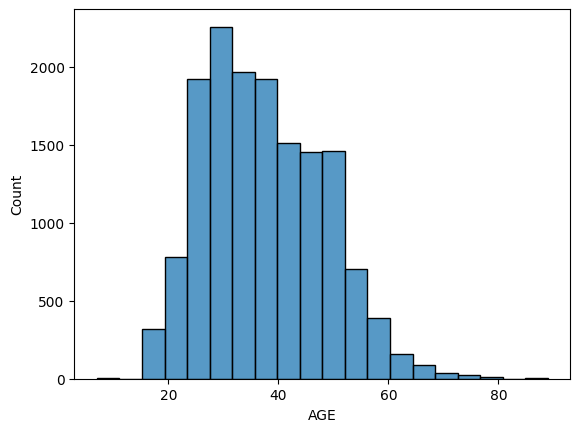

In [31]:
#10 Create a histogram for the AGE variable.
sns.histplot(data=TelecomSelected, x='AGE',bins=20)
plt.show()